In [67]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

In [68]:
df = pd.DataFrame([X[:,0], X[:,1], y]).T
df

,0,1,2
0,-7.689054,6.620346,3.0
1,-9.576514,-6.934404,2.0
2,6.829682,1.164871,1.0
3,-2.901306,7.550771,0.0
4,-5.678413,-7.288185,2.0
...,...,...,...
495,-7.438972,8.248157,3.0
496,-2.586299,9.355438,0.0
497,-7.215412,-5.211088,2.0
498,-7.402350,-5.831100,2.0


In [69]:
df.columns = ['x1', 'x2', 'label']
df['label'] = df['label'].astype(int)
df.head()

,x1,x2,label
0,-7.689054,6.620346,3
1,-9.576514,-6.934404,2
2,6.829682,1.164871,1
3,-2.901306,7.550771,0
4,-5.678413,-7.288185,2


<Axes: xlabel='x1', ylabel='x2'>

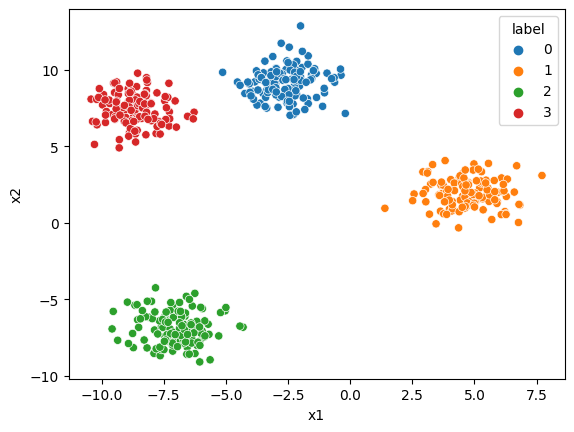

In [70]:
sns.scatterplot(x='x1', y='x2', hue='label', data=df, palette='tab10')

In [71]:
# remove label as we don't have it in unsupervised learning
X = df.drop('label', axis=1)
X.head()

,x1,x2
0,-7.689054,6.620346
1,-9.576514,-6.934404
2,6.829682,1.164871
3,-2.901306,7.550771
4,-5.678413,-7.288185


## Feature scaling
- no train test split
- use whole dataset to fit scaler

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
scaled_X[:5]

array([[-0.81539333,  0.58938951],
       [-1.17344434, -1.55328827],
       [ 1.93881064, -0.27298895],
       [ 0.0928425 ,  0.73646712],
       [-0.43397474, -1.60921239]])

Text(0.5, 1.0, 'Scaled X with feature standardization - no labels')

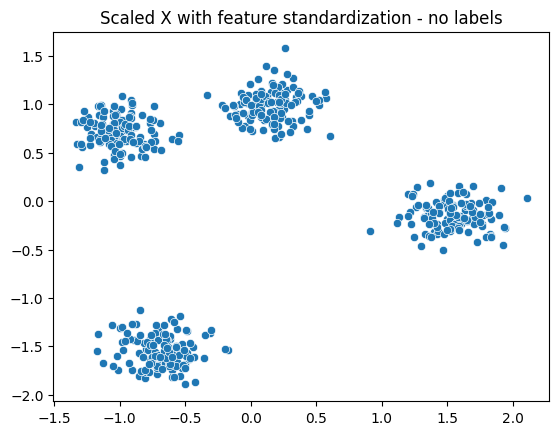

In [73]:
sns.scatterplot(x=scaled_X[:,0], y=scaled_X[:,1])
plt.title('Scaled X with feature standardization - no labels')

## K-means

In [74]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_squared_distance = [KMeans(k, n_init='auto').fit(scaled_X).inertia_ for k in clusters]
sum_squared_distance

[999.9999999999994,
 522.157053928774,
 116.09567852755526,
 28.786938978874005,
 26.10088600867453,
 22.849209910106794,
 20.30619226574555,
 18.53446006538764,
 18.88130350803541]

Text(0.5, 1.0, 'Elbow method for optimal k')

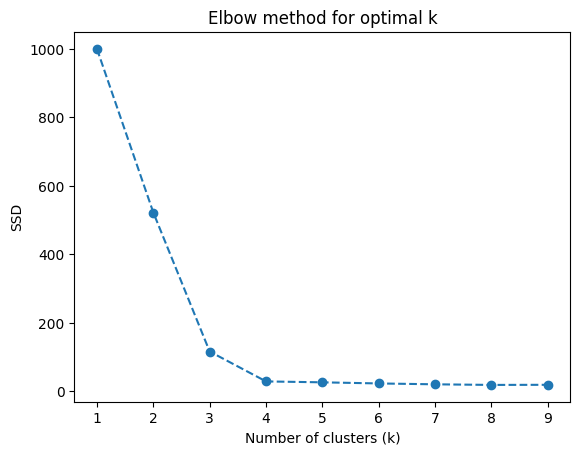

In [75]:
plt.plot(clusters, sum_squared_distance, '--o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSD')
plt.title('Elbow method for optimal k')

In [76]:
pd.Series(sum_squared_distance).diff()[1:]

# k = 3

1   -477.842946
2   -406.061375
3    -87.308740
4     -2.686053
5     -3.251676
6     -2.543018
7     -1.771732
8      0.346843
dtype: float64

## Silhouette score

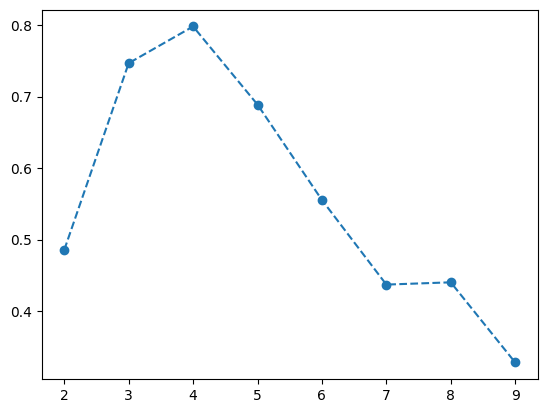

In [77]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init="auto").fit(scaled_X) for k in clusters]

silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
plt.plot(clusters[1:], silhouette_scores, "--o")

## Visualization

In [78]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])
df_plot.head()

,x1,x2
0,-0.815393,0.589390
1,-1.173444,-1.553288
2,1.938811,-0.272989
3,0.092842,0.736467
4,-0.433975,-1.609212


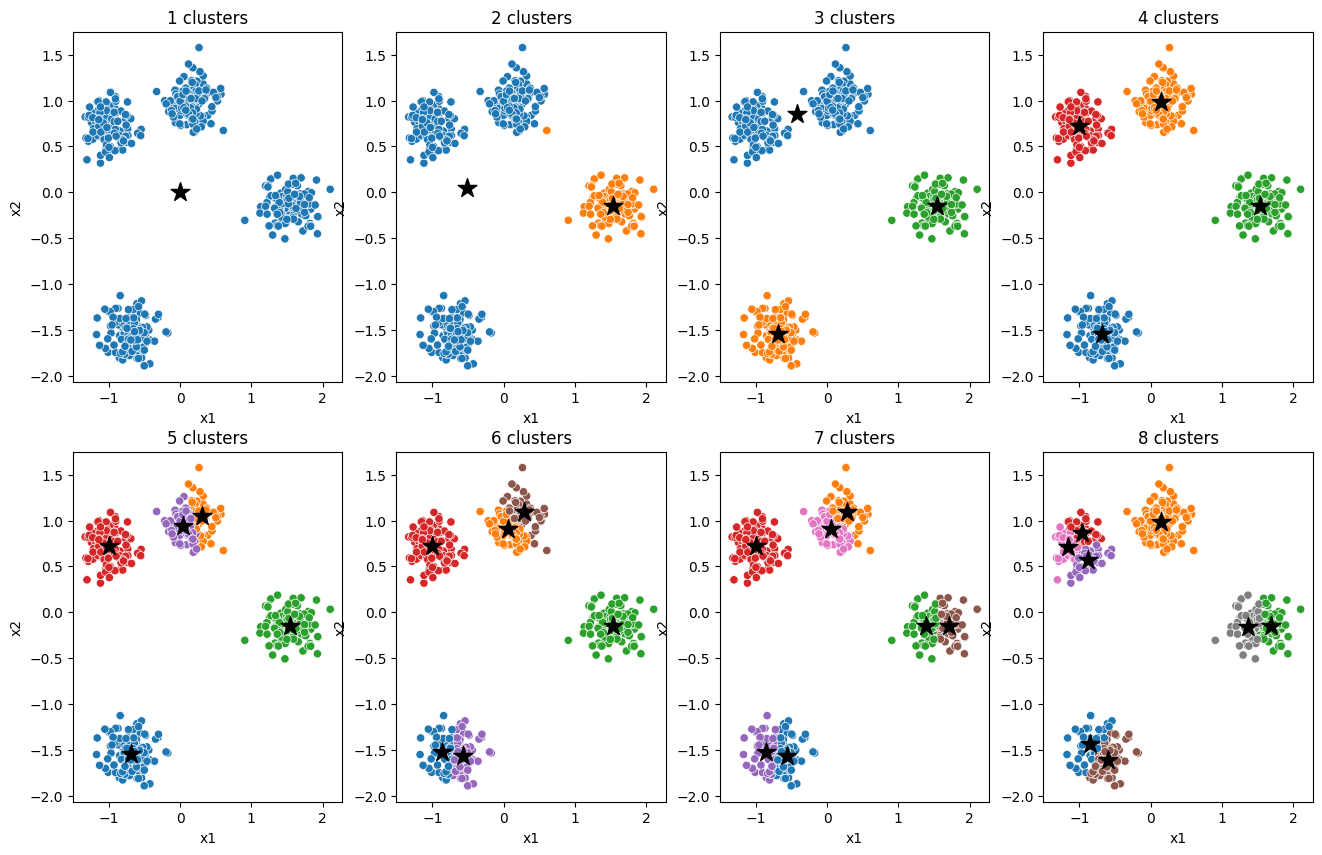

In [79]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

fig, axes = plt.subplots(2, 4, figsize=(16, 10))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scatterplot(data=df_plot, x="x1", y="x2", hue="label", ax=ax, palette="tab10")
    ax.scatter(
        cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker="*", color="black"
    )

    ax.legend([], [], frameon=False)

    ax.set(title = f"{i+1} clusters")

In [80]:
kmeans[2].cluster_centers_

array([[-0.42704371,  0.85078316],
       [-0.68486276, -1.54855438],
       [ 1.53895017, -0.15301193]])